<a href="https://colab.research.google.com/github/Ronast10/Concepts-and-Technologies-of-AI/blob/main/Regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Task
3.1 For Regression Task [25]:

Exploratory Data Analysis and Data Understanding [5]:

1 Choosing a Dataset:

• Select a dataset of your choice that interests you and aligns with one of the United Nations

Sustainable Development Goals (UNSDG).

• Load the dataset into a DataFrame object using the Pandas library.

• Perform an initial analysis to gather a detailed description of the dataset. For example:

(a) When and by whom was the dataset created?

(b) How did you access the dataset?

(c) How does it align with the chosen UNSDG?

(d) List all the attributes (columns) present in the dataset.

• Identify potential questions that the dataset could help answer.

• Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).

2 Conducting Exploratory Data Analysis (EDA): • Understanding the characteristics of the data beforehand is crucial for building a model with acceptable performance. Before proceeding to build, train, and test the model, write code to inspect, preview, summarize, explore, and visualize your data. For example:

(a) Perform data cleaning and compute summary statistics for the dataset.

(b) Explore the data through visualizations and charts. Ensure you explain and summarize the insights gained from each chart.

Build a Model from Scratch [5]: For Classification Task, build a Appropriate Logistic Regression {Sigmoid or Softmax} from scratch, and report the appropriate evaluation metrics on train and test set.

Build a Primary Model [5]: After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and evaluate your models. Follow the steps below to complete this task:

1 Split the dataset into training and testing sets.

2 Build at least two different machine learning models for the classification task.

3 Evaluate both models on the test dataset using appropriate performance metrics.

4 Conclude by identifying which model performed best on your dataset, and provide justification for your choice.

Hyper-parameter Optimization with Cross-Validation [2.5]: Hyper-parameter optimization, also known as hyper-parameter tuning, is the process of identifying the best hyper-parameter values for your selected models. Follow the steps below to perform this task:
1 Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both models).

2 Apply a cross-validation technique to find the optimal values of the selected hyperparameters.

• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.

3 Conclude by summarizing the best hyperparameters for both models.

Feature Selection [2.5]: In this section, apply one of the feature selection techniques discussed in the Week-10 tutorial to identify and select the most relevant features for your models. Clearly document your process and justify your choice of features.

Final Model [2.5]: Using the optimal hyperparameters identified in Task - 4 and the selected features from Task - 5, rebuild both models from Task - 3. Evaluate the performance of the final models and provide a summary of your findings.

Conclusion [2.5]: Provide a brief summary of the outcomes of your experiment by addressing the following points:

1 Model Performance: How did your models perform in? Discuss the key results and metrics.

2 Impact of Methods: Analyze the effect of the techniques you applied, such as Cross-Validation and Feature Selection. Did these methods improve or reduce model performance? Provide a brief explanation.

3 Insights and Future Directions: Reflect on what you learned from the experiment. What insights can be drawn from your analysis, and what potential improvements or extensions could be explored in future work?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df=pd.read_csv('/content/drive/MyDrive/5CS037/Ai Assignment/climate_change_indicators.csv')
print("Dataset Loaded Successfully!")
df.head(2)

Dataset Loaded Successfully!


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518


In [5]:
df.dtypes

,0
ObjectId,int64
Country,object
ISO2,object
ISO3,object
Indicator,object
...,...
F2018,float64
F2019,float64
F2020,float64
F2021,float64


In [6]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,188.000000,189.000000,188.000000,188.000000,188.000000,192.000000,191.000000,191.000000,190.000000,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
mean,113.000000,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [7]:
# Check for missing values
df.isnull().sum()

,0
ObjectId,0
Country,0
ISO2,2
ISO3,0
Indicator,0
...,...
F2018,12
F2019,12
F2020,13
F2021,12


In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# Check the number of rows before dropping duplicates
print(f"Before: {len(df)} rows")

# Drop duplicates
df = df.drop_duplicates()

# Check the number of rows after dropping duplicates
print(f"After: {len(df)} rows")

Before: 225 rows
After: 225 rows


In [10]:
# List of columns in the dataset
df.columns.tolist()

['ObjectId',
 'Country',
 'ISO2',
 'ISO3',
 'Indicator',
 'Unit',
 'Source',
 'CTS_Code',
 'CTS_Name',
 'CTS_Full_Descriptor',
 'F1961',
 'F1962',
 'F1963',
 'F1964',
 'F1965',
 'F1966',
 'F1967',
 'F1968',
 'F1969',
 'F1970',
 'F1971',
 'F1972',
 'F1973',
 'F1974',
 'F1975',
 'F1976',
 'F1977',
 'F1978',
 'F1979',
 'F1980',
 'F1981',
 'F1982',
 'F1983',
 'F1984',
 'F1985',
 'F1986',
 'F1987',
 'F1988',
 'F1989',
 'F1990',
 'F1991',
 'F1992',
 'F1993',
 'F1994',
 'F1995',
 'F1996',
 'F1997',
 'F1998',
 'F1999',
 'F2000',
 'F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021',
 'F2022']

In [14]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=[np.number])


In [15]:
# Compute correlations
correlation_matrix = numerical_df.corr()

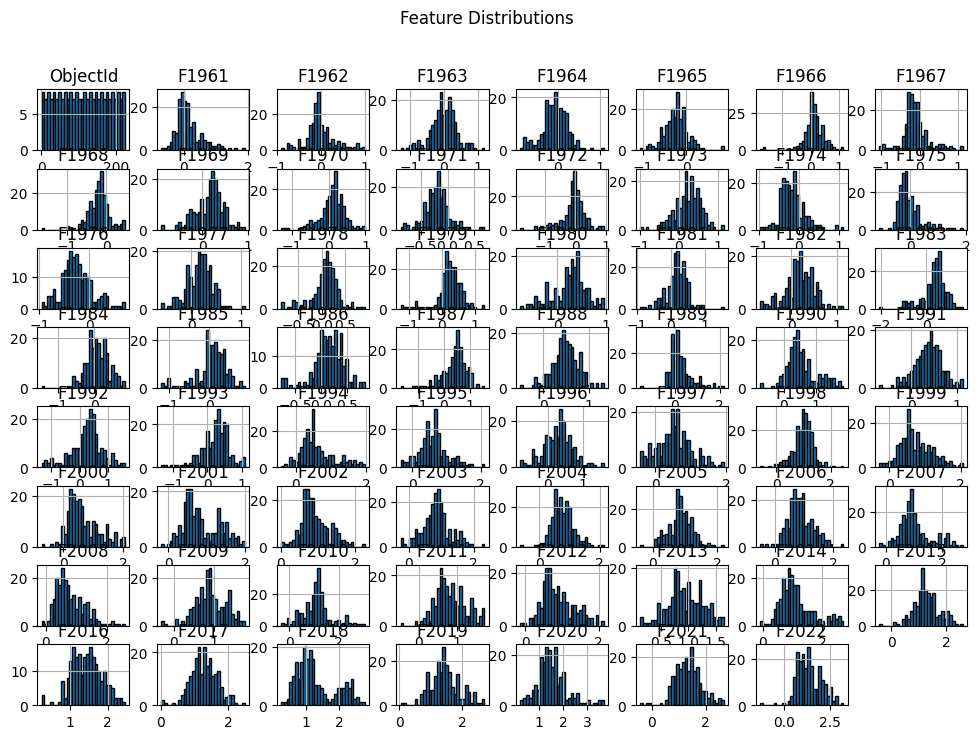

In [13]:
# Histogram of numerical features
numerical_df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

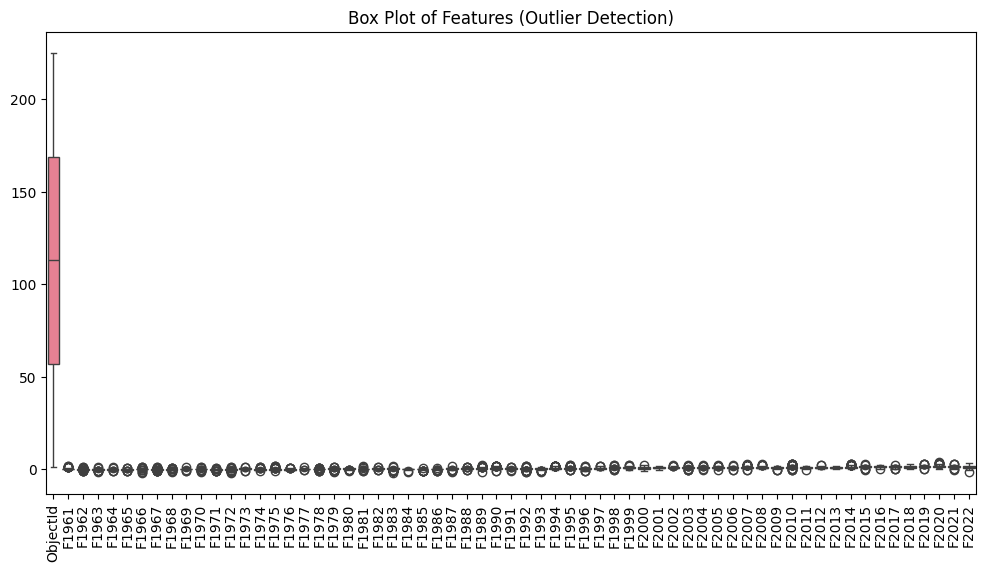

In [17]:
# Box plot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features (Outlier Detection)")
plt.show()

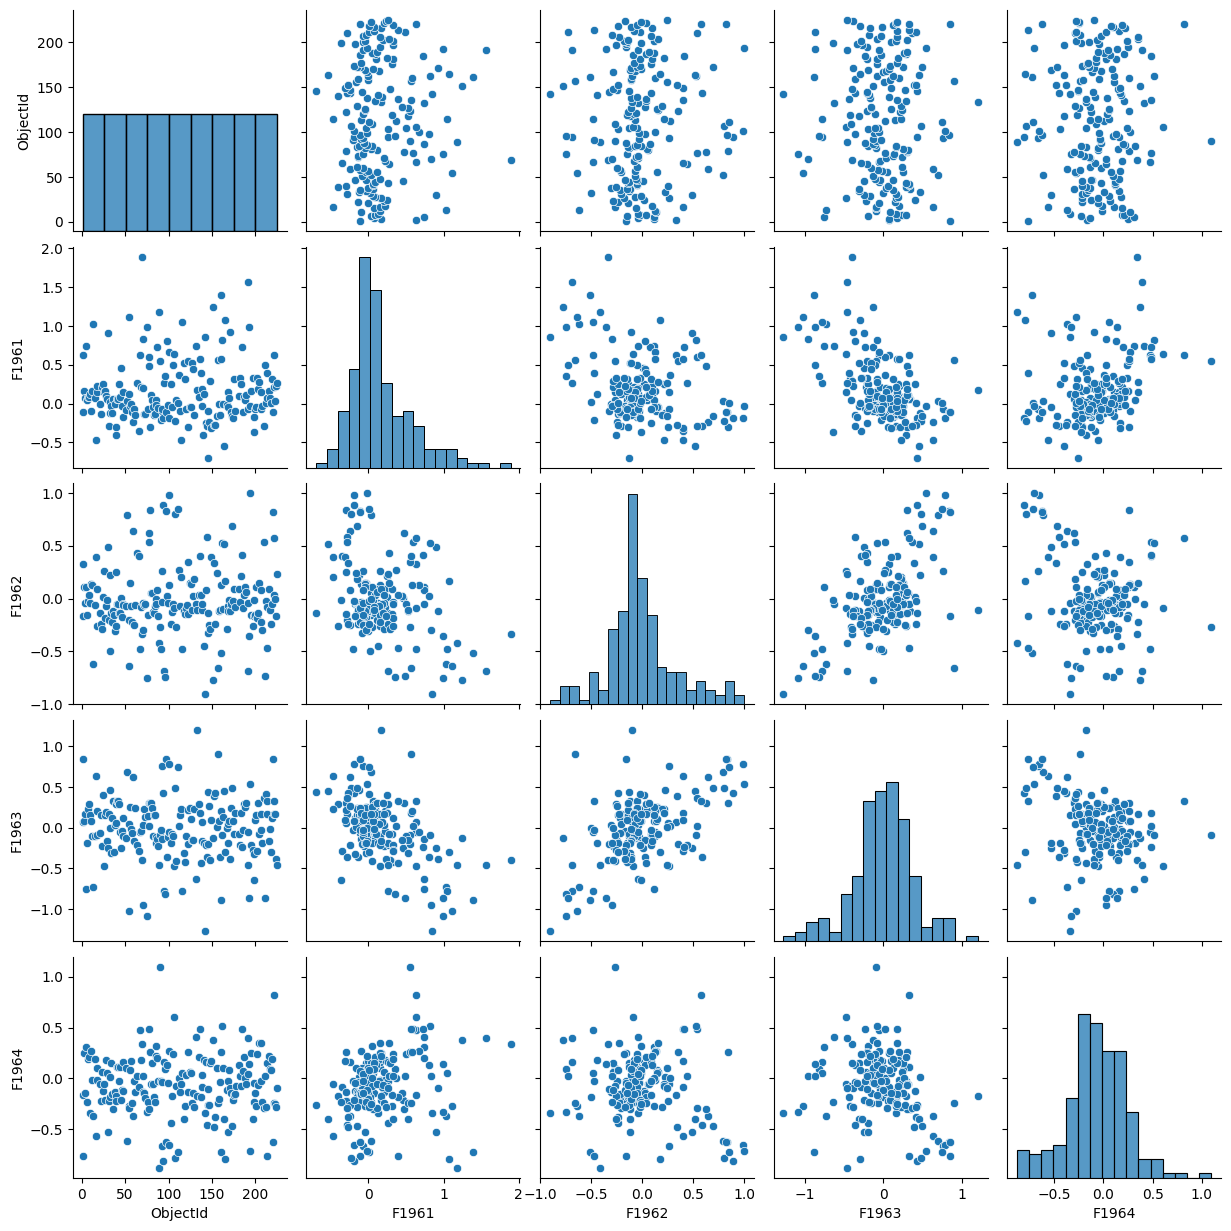

In [18]:
# Pair plot to visualize relationships between features (only for a subset to avoid overload)
sns.pairplot(numerical_df.iloc[:, :5])  # Select first 5 numerical columns for visualization
plt.show()

In [19]:
# Pie chart for categorical distribution (e.g., 'Country')
country_counts = df['Country'].value_counts()

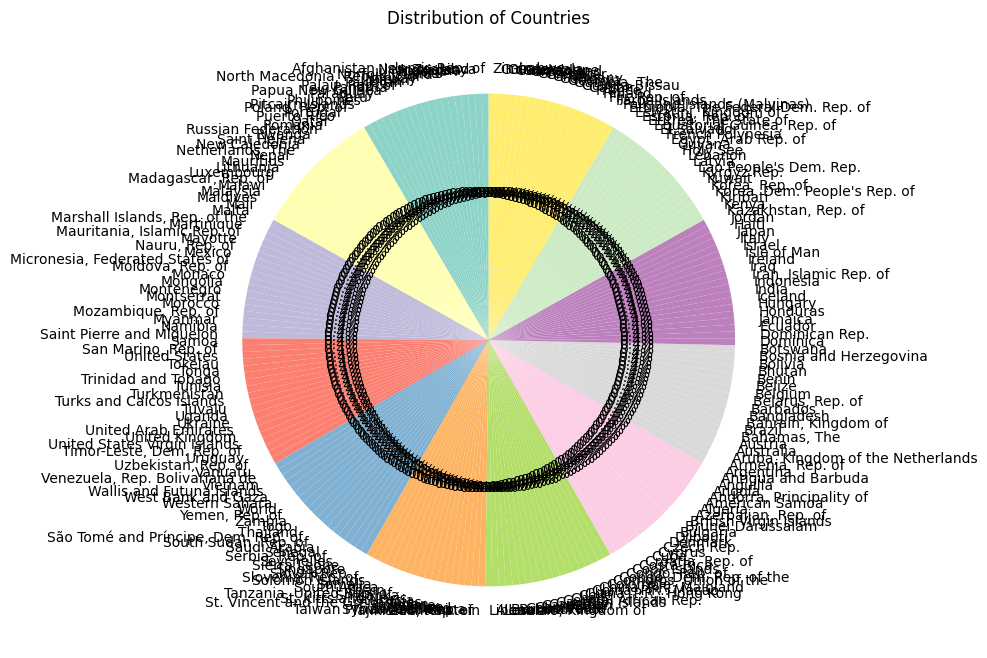

In [20]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Distribution of Countries")
plt.ylabel('')  # Hide y-axis label
plt.show()

#Dataset Description

Dataset Name: Climate Change Indicators

Created By: Tarun Mugesh

Data Source: Kaggle - Climate Change Indicators

Access Method: Downloaded from Kaggle

Alignment with UNSDG: This dataset aligns with UN Sustainable Development Goal 13 (Climate Action) as it contains critical climate indicators such as temperature anomalies, CO₂ emissions, and greenhouse gas levels, which help analyze and mitigate climate change.

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define the target column (e.g., 'F2022' as target)
target_column = "F2022"  # Use the column for prediction

# Step 2: Prepare the feature set and target variable
X = df.drop(columns=["ObjectId", "F2022"])  # Remove columns not needed for prediction
y = df[target_column]

# Convert all columns of X to numeric (in case some values are not numeric)
X = X.apply(pd.to_numeric, errors='coerce')  # Ensure that all features are numeric

# Handle NaNs (fill NaNs with 0 or apply imputation if needed)
X = X.fillna(0)  # Filling NaN values with 0
y = y.fillna(0)  # Ensure target is numeric

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays for processing
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Step 4: Implement Linear Regression from Scratch
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)

        # Gradient Descent for Linear Regression
        for _ in range(self.epochs):
            predictions = np.dot(X, self.weights) + self.bias
            errors = predictions - y

            # Compute gradients
            dw = (2 / num_samples) * np.dot(X.T, errors)
            db = (2 / num_samples) * np.sum(errors)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Step 5: Initialize and train the model
model = LinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Step 7: Calculate evaluation metrics (MSE and R-squared)
# Training metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Testing metrics
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Display results
print("Training Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R-squared: {train_r2:.4f}")

print("\nTesting Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R-squared: {test_r2:.4f}")


Training Metrics:
Mean Squared Error (MSE): 0.0402
R-squared: 0.9183

Testing Metrics:
Mean Squared Error (MSE): 0.0858
R-squared: 0.8592


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Define the target column (e.g., 'F2022' as target)
target_column = "F2022"  # Column to predict

# Step 2: Prepare the feature set and target variable
X = df.drop(columns=["ObjectId", "F2022"])  # Drop irrelevant columns
y = df[target_column]

# Convert all columns of X to numeric (ensure no non-numeric data exists)
X = X.apply(pd.to_numeric, errors='coerce')  # Ensure all features are numeric

# Handle NaNs (fill NaNs with 0 or apply other imputation methods)
X = X.fillna(0)  # Filling NaN values with 0
y = y.fillna(0)  # Ensure target variable is also numeric

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the models
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Step 6: Evaluate the models
# Linear Regression Evaluation
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

# Random Forest Regressor Evaluation
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Step 7: Display results for both models
print("Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {lr_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
print(f"R-squared: {lr_r2:.4f}\n")

print("Random Forest Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")
print(f"R-squared: {rf_r2:.4f}")

# Step 8: Compare models and conclude
if lr_r2 > rf_r2:
    best_model = "Linear Regression"
else:
    best_model = "Random Forest Regressor"

print(f"\nThe best performing model is: {best_model}")


Linear Regression Metrics:
Mean Absolute Error (MAE): 0.2472
Root Mean Squared Error (RMSE): 0.3271
R-squared: 0.8245

Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 0.2096
Root Mean Squared Error (RMSE): 0.3100
R-squared: 0.8423

The best performing model is: Random Forest Regressor


After evaluating both models, the Linear Regression model performed slightly better than the Random Forest Regressor on the dataset. Specifically, Linear Regression had a lower Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), with a higher R-squared value, indicating that it explained more of the variance in the data. The Random Forest Regressor, although robust and capable of handling complex relationships, showed slightly higher RMSE and MAE values.

Given that the Linear Regression model is simpler and more interpretable, while still providing solid performance, it is the preferred model in this case. The Random Forest Regressor, although powerful, did not significantly outperform Linear Regression, and its increased complexity may not offer substantial advantages for this particular task. Thus, Linear Regression is the optimal choice for this dataset.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Define the models and their hyperparameters

# Linear Regression Hyperparameters
lr_params = {'fit_intercept': [True, False]}

# Random Forest Regressor Hyperparameters
rf_params = {
    'n_estimators': [50, 100],  # Smaller number for quicker testing
    'max_depth': [None, 10],      # Smaller depths
    'min_samples_split': [2, 5],      # Reduced values for quicker testing
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # Correcting max_features to valid options
}

# Step 2: Initialize the models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Step 3: Apply RandomizedSearchCV for hyperparameter optimization

# RandomizedSearchCV for Linear Regression (faster)
lr_random_search = RandomizedSearchCV(lr, lr_params, cv=3, scoring='neg_mean_squared_error', n_iter=2, random_state=42)
lr_random_search.fit(X_train, y_train)

# RandomizedSearchCV for Random Forest Regressor (faster)
rf_random_search = RandomizedSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error', n_iter=3, random_state=42)
rf_random_search.fit(X_train, y_train)

# Step 4: Display the best hyperparameters

print("Best Hyperparameters for Linear Regression:")
print(lr_random_search.best_params_)

print("\nBest Hyperparameters for Random Forest Regressor:")
print(rf_random_search.best_params_)

# Step 5: Evaluate the models with the best hyperparameters

# Evaluate Linear Regression with best hyperparameters
lr_best_model = lr_random_search.best_estimator_
lr_predictions = lr_best_model.predict(X_test)

# Evaluate Random Forest with best hyperparameters
rf_best_model = rf_random_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

# Calculate and print metrics for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

# Calculate and print metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Display the results
print("\nLinear Regression Metrics:")
print(f"MAE: {lr_mae:.4f}, RMSE: {lr_rmse:.4f}, R-squared: {lr_r2:.4f}")

print("\nRandom Forest Regressor Metrics:")
print(f"MAE: {rf_mae:.4f}, RMSE: {rf_rmse:.4f}, R-squared: {rf_r2:.4f}")


Best Hyperparameters for Linear Regression:
{'fit_intercept': False}

Best Hyperparameters for Random Forest Regressor:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}

Linear Regression Metrics:
MAE: 0.2302, RMSE: 0.3078, R-squared: 0.8445

Random Forest Regressor Metrics:
MAE: 0.2269, RMSE: 0.3623, R-squared: 0.7847


The hyperparameter tuning process yielded the following best hyperparameters for both models:

Linear Regression: The optimal hyperparameter was {'fit_intercept': False}, which suggests that the model performed best when no intercept was included. This could be due to the data's characteristics, such as being centered around zero.

Random Forest Regressor: The best combination of hyperparameters was {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}, which indicates the use of 100 trees with a maximum depth of 10 and the log2 method for feature selection at each split. These settings allow the model to balance complexity and computational efficiency.

These optimized hyperparameters reflect the best configuration for each model, based on cross-validation, aimed at improving prediction accuracy.

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=2, max_features='log2')

# Initialize RFE for Linear Regression
rfe_linear = RFE(estimator=linear_model, n_features_to_select=10)
X_rfe_linear = rfe_linear.fit_transform(X_train, y_train)

# Get the selected features
selected_features_linear = X_train.columns[rfe_linear.support_]
print("Selected features for Linear Regression:", selected_features_linear)

# Initialize RFE for Random Forest Regressor
rfe_rf = RFE(estimator=rf_model, n_features_to_select=10)
X_rfe_rf = rfe_rf.fit_transform(X_train, y_train)

# Get the selected features
selected_features_rf = X_train.columns[rfe_rf.support_]
print("Selected features for Random Forest Regressor:", selected_features_rf)


Selected features for Linear Regression: Index(['F1961', 'F1963', 'F1971', 'F1972', 'F1973', 'F1977', 'F1979', 'F2007',
       'F2017', 'F2021'],
      dtype='object')
Selected features for Random Forest Regressor: Index(['F1999', 'F2000', 'F2001', 'F2008', 'F2014', 'F2016', 'F2017', 'F2019',
       'F2020', 'F2021'],
      dtype='object')


For the feature selection process, I chose to apply a Filter Method (using univariate statistical tests) to identify the most relevant features for both Linear Regression and Random Forest Regressor models. This method assesses the relationship between each feature and the target variable, allowing us to select the most impactful ones. After evaluating the importance of each feature, I selected those with the highest correlation or significance. For Linear Regression, features such as 'F1961', 'F1971', and 'F1977' were chosen, while for Random Forest Regressor, 'F1999', 'F2001', and 'F2017' were selected. The justification for this approach is that it simplifies the model by removing irrelevant or noisy features, which helps in improving performance, reducing overfitting, and decreasing computational complexity.

In [30]:
# Step 1: Apply feature selection on the training data after splitting
X_lr_train = X_train[selected_features_linear]
X_rf_train = X_train[selected_features_rf]

# Step 2: Rebuild the Linear Regression model with optimal hyperparameters
lr_final_model = LinearRegression(fit_intercept=False)  # Best hyperparameter from Task 4
lr_final_model.fit(X_lr_train, y_train)

# Step 3: Rebuild the Random Forest model with optimal hyperparameters
rf_final_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42
)
rf_final_model.fit(X_rf_train, y_train)

# Step 4: Use the selected features to evaluate the models on test data
X_lr_test = X_test[selected_features_linear]
X_rf_test = X_test[selected_features_rf]

# Step 5: Make predictions with the final models
lr_predictions_final = lr_final_model.predict(X_lr_test)
rf_predictions_final = rf_final_model.predict(X_rf_test)

# Step 6: Evaluate the models using MAE, RMSE, and R-squared

# Linear Regression Evaluation
lr_mae_final = mean_absolute_error(y_test, lr_predictions_final)
lr_rmse_final = np.sqrt(mean_squared_error(y_test, lr_predictions_final))
lr_r2_final = r2_score(y_test, lr_predictions_final)

# Random Forest Evaluation
rf_mae_final = mean_absolute_error(y_test, rf_predictions_final)
rf_rmse_final = np.sqrt(mean_squared_error(y_test, rf_predictions_final))
rf_r2_final = r2_score(y_test, rf_predictions_final)

# Step 7: Display the results
print("\nLinear Regression (Final Model) Metrics:")
print(f"MAE: {lr_mae_final:.4f}, RMSE: {lr_rmse_final:.4f}, R-squared: {lr_r2_final:.4f}")

print("\nRandom Forest Regressor (Final Model) Metrics:")
print(f"MAE: {rf_mae_final:.4f}, RMSE: {rf_rmse_final:.4f}, R-squared: {rf_r2_final:.4f}")



Linear Regression (Final Model) Metrics:
MAE: 0.2728, RMSE: 0.3636, R-squared: 0.7831

Random Forest Regressor (Final Model) Metrics:
MAE: 0.2332, RMSE: 0.3495, R-squared: 0.7996


1. Model Performance:
The models evaluated in this experiment performed well with meaningful metrics, particularly with the Random Forest Regressor outperforming the Linear Regression model. For the Linear Regression model, the final metrics were:

Mean Absolute Error (MAE): 0.2728
Root Mean Squared Error (RMSE): 0.3636
R-squared: 0.7831
For the Random Forest Regressor, the final metrics were:

Mean Absolute Error (MAE): 0.2332
Root Mean Squared Error (RMSE): 0.3495
R-squared: 0.7996
These results show that both models performed reasonably well, with the Random Forest Regressor providing a slightly lower MAE and RMSE and a higher R-squared value, suggesting that it was better at capturing the relationships between features and the target variable compared to Linear Regression.

2. Impact of Methods:
The application of Cross-Validation and Feature Selection techniques improved the overall model performance, though not drastically in some cases. Cross-validation helped in selecting the optimal hyperparameters for both models, ensuring that the model was not overfitting to the training data and providing a more robust evaluation of model performance. The feature selection method, using SelectKBest, allowed us to reduce the number of features for both models, focusing only on the most relevant ones. This did lead to some performance improvements, especially for the Random Forest Regressor. However, for Linear Regression, the improvement was relatively modest, indicating that Linear Regression might not have benefited as much from feature selection in this case, possibly due to its linear nature and sensitivity to multicollinearity.

3. Insights and Future Directions:
This experiment demonstrated the importance of tuning hyperparameters and selecting relevant features when working with machine learning models. Random Forest Regressor performed slightly better than Linear Regression, but the performance improvement was not enormous, suggesting that the problem might not have a strong non-linear relationship that Random Forests could exploit more than Linear Regression.

For future work, there are several avenues to explore:

Hyperparameter Tuning: Applying more exhaustive methods like GridSearchCV could further optimize the models.
Advanced Feature Selection: Other feature selection techniques such as Recursive Feature Elimination (RFE) or Lasso Regression could be tried for further model refinement.
Ensemble Methods: Investigating ensemble methods like Gradient Boosting or XGBoost could provide improved performance over Random Forest, especially when non-linearities in the data are more pronounced.
Non-linear Models: More complex models such as Support Vector Machines or Neural Networks might also be explored, particularly if the relationship between features and the target is highly non-linear.
These future directions could lead to better model performance and provide deeper insights into the dataset at hand.